In [391]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Data cleaning and exploration

In [392]:
data = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# display all columns
pd.set_option('display.max_columns', None)

data.head(3)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,B,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,H,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,X,726.0,POLICE FACILITY,NaN,NaN,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474


In [393]:
# remove unnecessary columns for the analysis
data.drop(['DR_NO', 'AREA', 'Mocodes', 'Premis Cd', 'Weapon Used Cd', 'Crm Cd 1',
          'Status', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street'], axis = 1, inplace=True)

# display the data with important columns for analysis
data.head(3)

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LAT,LON
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,34.0459,-118.2545
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,POLICE FACILITY,NaN,Adult Arrest,34.0448,-118.2474


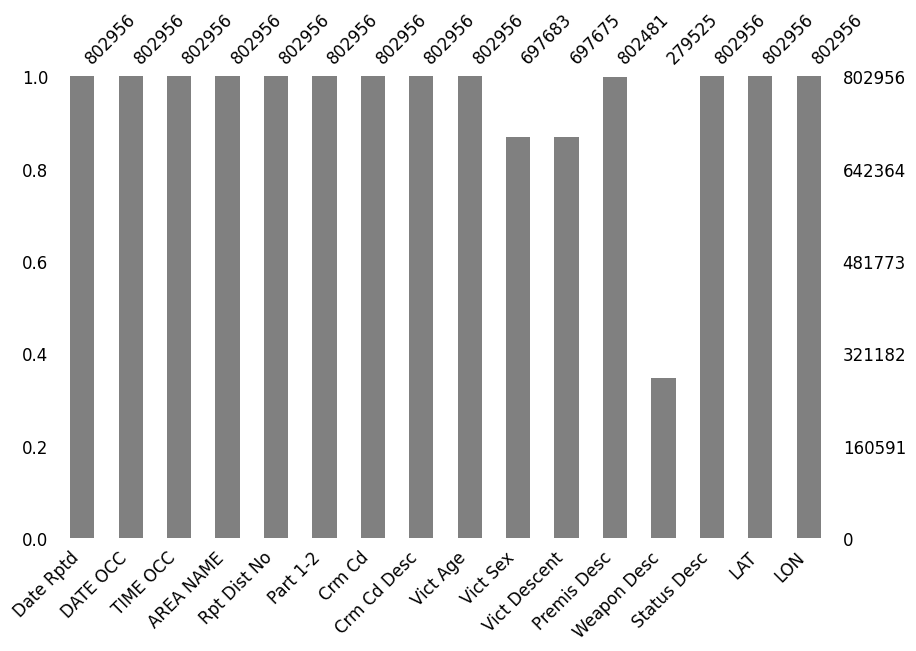

In [394]:
import missingno as msno

# plot the missing values in each column
msno.bar(data, figsize=(10, 6), fontsize=12, color='gray')
plt.show()

In [395]:
# there is a lot of missing information about 'Weapon Desc' column, so i have to drop it too
data.drop('Weapon Desc', axis = 1, inplace = True)

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802956 entries, 0 to 802955
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date Rptd     802956 non-null  object 
 1   DATE OCC      802956 non-null  object 
 2   TIME OCC      802956 non-null  int64  
 3   AREA NAME     802956 non-null  object 
 4   Rpt Dist No   802956 non-null  int64  
 5   Part 1-2      802956 non-null  int64  
 6   Crm Cd        802956 non-null  int64  
 7   Crm Cd Desc   802956 non-null  object 
 8   Vict Age      802956 non-null  int64  
 9   Vict Sex      697683 non-null  object 
 10  Vict Descent  697675 non-null  object 
 11  Premis Desc   802481 non-null  object 
 12  Status Desc   802956 non-null  object 
 13  LAT           802956 non-null  float64
 14  LON           802956 non-null  float64
dtypes: float64(2), int64(5), object(8)
memory usage: 91.9+ MB


# Investigate each column

### Date Rptd: Date when the incident was reported. 

In [397]:
# extract the date
data['Date Rptd'] = pd.to_datetime(data['Date Rptd']).dt.date

# rename to 'Report Date'
data = data.rename(columns={'Date Rptd': 'Report Date'})

# convert the column to datetime
data['Report Date'] = pd.to_datetime(data['Report Date'])

### DATE OCC: Date when the incident occurred.

In [398]:
# extract the date
data['DATE OCC'] = pd.to_datetime(data['DATE OCC']).dt.date

# rename to 'Crime Date'
data = data.rename(columns={'DATE OCC': 'Crime Date'})

# convert the column to datetime
data['Crime Date'] = pd.to_datetime(data['Crime Date'])

### TIME OCC: Time of day when the incident occurred.

In [399]:
# convert to string
data['TIME OCC'] = data['TIME OCC'].astype(str)

# pad zeros to the left
data['TIME OCC'] = data['TIME OCC'].str.zfill(4)

# add a colon to separate hours and minutes
data['TIME OCC'] = data['TIME OCC'].str[:2] + ':' + data['TIME OCC'].str[2:]

# rename to 'Crime Time'
data = data.rename(columns={'TIME OCC': 'Crime Time'})

# convert the column to datetime
data['Crime Time'] = pd.to_datetime(data['Crime Time'], format='%H:%M')
data['Crime Time'] = data['Crime Time'].dt.time

### AREA NAME: Name of the incident area.

In [400]:
# what unique values we have here?
data['AREA NAME'].value_counts()

AREA NAME
Central        53901
77th Street    50732
Pacific        46915
Southwest      44931
Hollywood      42658
Southeast      40971
Olympic        40623
Newton         40178
N Hollywood    39916
Wilshire       38100
Rampart        37392
West LA        36855
Northeast      34674
Van Nuys       34093
West Valley    33642
Harbor         33254
Devonshire     32588
Topanga        32588
Mission        31972
Hollenbeck     30134
Foothill       26839
Name: count, dtype: int64

In [401]:
# replace the values of 'N Hollywood' to 'North Hollywood'
data['AREA NAME'].replace('N Hollywood', 'North Hollywood', inplace = True)

### Rpt Dist No: Reporting district within the area.

In [402]:
# we just want to rename this column to 'No. Report District'
data = data.rename(columns={'Rpt Dist No': 'No. Report District'})

### Part 1-2: Classification of the incident as Part 1 or Part 2 crime.

**Part I Crimes and Data Gathering**

When creating a system for Uniform Crime Reports (UCR) on arrests and offenses, the FBI opted to separate out serious crimes to understand the societal and public safety impact. These Part I offenses occur with regularity throughout the US and are likely to be reported to police, as opposed to so-called victimless crimes. Officials can optimize data on Part I offenses by comparing crimes known to police with total arrests. This category includes:

- Homicide charges, from first degree premeditated and second degree “depraved mind” murder to manslaughter, felony murder, and negligent killings;
- Sexual assault and forcible rape;
- Robbery, burglary, larceny, and other theft crimes;
- Aggravated assault; and
- Arson. 

**Collection of Part II Crimes Information**

These offenses are generally less severe in terms of the impact for society and public safety. Information on crimes known to police is not practical for data purposes, since victims of Part II offenses may not notify police; plus, crimes are considered victimless. As such, only arrests are reported for Part II crimes, such as:

- Simple assault and attempted assault which do not result in injury to the victim;
- Offenses typically referred to as “white collar” crimes, including forgery, counterfeiting, and embezzlement;
- All types of fraud, in which someone enjoys financial gain by making misrepresentations and inducing a victim to part with something of value;
- Violations of gun laws that prohibit the manufacture, sale, purchase, possession, or use of firearms;
- Prostitution and solicitation;
- Drug crimes;
- Violations of liquor and gambling laws; and
- Drunk driving. 

[www.kevinkuliklaw.com](https://www.kevinkuliklaw.com/what-is-the-difference-between-part-i-and-part-ii-crimes-in-florida/)

In [403]:
# what unique values we have here?
data['Part 1-2'].value_counts()

Part 1-2
1    470299
2    332657
Name: count, dtype: int64

In [404]:
# we want to rename this column to 'Uniform Crime Reports (UCR)'
data = data.rename(columns={'Part 1-2': 'Uniform Crime Reports (UCR)'})

### Crm Cd: Numeric code for the type of crime.
Indicates the crime committed, **Lower crime class numbers are more serious**.

In [405]:
# we just want to rename this column to 'Crime Code'
data = data.rename(columns={'Crm Cd': 'Crime Code'})

### Crm Cd Desc: Description of the crime code.

In [406]:
# we just want to rename this column to 'Crime Description'
data = data.rename(columns={'Crm Cd Desc': 'Crime Description'})

### Vict Age, Vict Sex, Vict Descent: Victim demographics.

#### Vict Age

In [407]:
# basic stats about the column
data['Vict Age'].describe()

count    802956.000000
mean         29.847791
std          21.762934
min          -3.000000
25%           9.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Vict Age, dtype: float64

In [408]:
# shape of values under or equal 0
data[data['Vict Age'] <= 0].shape

(197486, 15)

In [409]:
# what are the mean of ages above 0?
data[data['Vict Age'] > 0]['Vict Age'].mean()

39.583373247229424

In [410]:
# range of values near the mean
fixed_values = [40, 35, 45, 30]

# generate random indices for filling values
random_indices = np.random.choice(len(fixed_values), size=197486)

# impute the values with random selection of out fixed values
data.loc[data['Vict Age'] <= 0, 'Vict Age'] = np.array(fixed_values)[random_indices]

In [411]:
# delete this since it maybe outlier (just one record that have 120 years old with some missing information)
data = data[data['Vict Age'] < 110]

# we want to rename this column to 'Victim Age'
data = data.rename(columns={'Vict Age': 'Victim Age'})

# basic stats about the column to see what changed
data['Victim Age'].describe()

count    802955.000000
mean         39.072215
std          13.838597
min           2.000000
25%          30.000000
50%          37.000000
75%          45.000000
max          99.000000
Name: Victim Age, dtype: float64

In [412]:
# new derived column segments the ages into groups
groups = [
    (data['Victim Age'] <= 12),
    (data['Victim Age'] >= 13) & (data['Victim Age'] < 18),
    (data['Victim Age'] >= 18) & (data['Victim Age'] < 65),
    (data['Victim Age'] >= 65)
]

labels = ['Child', 'Teen', 'Adult', 'Old']

# create new column 'Age Group'
data['Age Group'] = np.select(groups, labels)

In [413]:
# change the position orf the new column
move = data.pop('Age Group')
data.insert(9, 'Age Group', move)

#### Vict Sex

In [414]:
# what unique values we have here?
data['Vict Sex'].value_counts()

Vict Sex
M    331958
F    296071
X     69565
H        88
-         1
Name: count, dtype: int64

In [415]:
# replace values with the full gender name and add 'H' vales to Unknown label
data['Vict Sex'].replace({'M':'Male', 'F':'Female', 'X':'Unknown', 'H':'Unknown'}, inplace = True)

# fill null values with 'Unknown'
data['Vict Sex'].fillna('Unknown', inplace=True)

# we want to rename this column to 'Victim Gender'
data = data.rename(columns={'Vict Sex': 'Victim Gender'})

#### Vict Descent

In [416]:
# what unique values we have here?
data['Vict Descent'].value_counts()

Vict Descent
H    246453
W    164007
B    114645
X     76912
O     63709
A     17563
K      4281
F      3344
C      3064
J      1113
V       828
I       762
Z       407
P       214
U       166
D        58
G        54
L        49
S        44
-         2
Name: count, dtype: int64

In [417]:
# replace values with its corresponding label
descent_mapping = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean', 
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    '-': 'Unknown',
    'Z': 'Asian Indian'
}

data['Vict Descent'].replace(descent_mapping, inplace = True)

# fill null values with 'Unknown'
data['Vict Descent'].fillna('Unknown', inplace=True)

# we want to rename this column to 'Victim Descent'
data = data.rename(columns={'Vict Descent': 'Victim Descent'})

### Premis Desc: Description of the incident location.
The type of structure, vehicle, or location where the crime took place.

In [418]:
# fill null values with 'Unknown'
data['Premis Desc'].fillna('Unknown', inplace=True)

# we want to rename this column to 'Crime Location'
data = data.rename(columns={'Premis Desc': 'Crime Location'})

### Status Desc: Description of the incident status.

In [419]:
# what unique values we have here?
data['Status Desc'].value_counts()

Status Desc
Invest Cont     642827
Adult Other      86206
Adult Arrest     69954
Juv Arrest        2592
Juv Other         1373
UNK                  3
Name: count, dtype: int64

In [420]:
# we want to rename this column to 'Case Status'
data = data.rename(columns={'Status Desc': 'Case Status'})

### LAT: Latitude coordinate. LON: Longitude coordinate.

In [421]:
# we want to rename this column to 'Latitude' and 'Longitude'
data = data.rename(columns={'LAT': 'Latitude', 'LON': 'Longitude'})

# Data validation

In [422]:
# display sample recordrs
data.head()

,Report Date,Crime Date,Crime Time,AREA NAME,No. Report District,Uniform Crime Reports (UCR),Crime Code,Crime Description,Victim Age,Age Group,Victim Gender,Victim Descent,Crime Location,Case Status,Latitude,Longitude
0,2020-01-08,2020-01-08,22:30:00,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,Adult,Female,Black,SINGLE FAMILY DWELLING,Adult Other,34.0141,-118.2978
1,2020-01-02,2020-01-01,03:30:00,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,Adult,Male,Hispanic/Latin/Mexican,SIDEWALK,Invest Cont,34.0459,-118.2545
2,2020-04-14,2020-02-13,12:00:00,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,30,Adult,Unknown,Unknown,POLICE FACILITY,Adult Arrest,34.0448,-118.2474
3,2020-01-01,2020-01-01,17:30:00,North Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,Old,Female,White,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",Invest Cont,34.1685,-118.4019
4,2020-01-01,2020-01-01,04:15:00,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,Adult,Unknown,Unknown,BEAUTY SUPPLY STORE,Invest Cont,34.2198,-118.4468


In [423]:
# datatypes
data.dtypes

Report Date                    datetime64[ns]
Crime Date                     datetime64[ns]
Crime Time                             object
AREA NAME                              object
No. Report District                     int64
Uniform Crime Reports (UCR)             int64
Crime Code                              int64
Crime Description                      object
Victim Age                              int64
Age Group                              object
Victim Gender                          object
Victim Descent                         object
Crime Location                         object
Case Status                            object
Latitude                              float64
Longitude                             float64
dtype: object

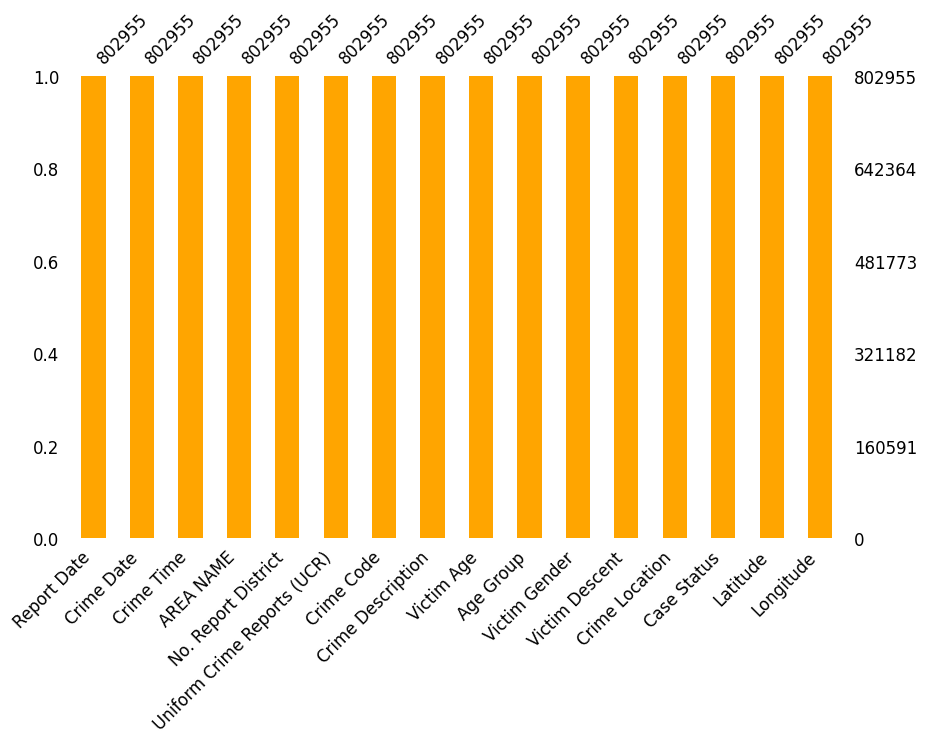

In [424]:
# plot the missing values in each column
msno.bar(data, figsize=(10, 6), fontsize=12, color='orange')
plt.show()

In [425]:
data.to_csv('LA_Crime_Data_2020_2023_Cleaned.csv')